#**Potenciación del gradiente en Python**
##*COMPETITION TITLE: House Prices - Advanced Regression Techniques*
COMPETITION WEBSITE: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




In [193]:
# Obtener datos
test_df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_10/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_10/train.csv')
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [143]:
data = pd.concat([test_df,train_df],axis=0,ignore_index=True)

In [99]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [145]:
def checkNull_fillData(df):
    for col in df.columns:
        if len(df.loc[df[col].isnull() == True]) != 0:
            if df[col].dtype == "float64" or df[col].dtype == "int64":
                df.loc[df[col].isnull() == True,col] = df[col].median()
            else:
                df.loc[df[col].isnull() == True,col] = "Missing"
                
checkNull_fillData(data)



In [146]:
col_names = []
for col in data:
    if data[col].dtypes == "object":
        col_names.append(col)
        
from sklearn.preprocessing import LabelEncoder


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [22]:
num: LotArea MSSubClass YearBuilt GrLivArea
cat= LotShape Street Neighborhood HouseStyle RoofStyle Heating SaleCondition

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,163000.0
1,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,163000.0
2,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,163000.0
3,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,Missing,Missing,Missing,0,6,2010,WD,Normal,163000.0
4,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,Missing,Missing,Missing,0,1,2010,WD,Normal,163000.0


In [201]:
data = data.dropna(subset=['SalePrice'])

#elimino observaciones sin precio

In [202]:
y = data.loc[:, 'SalePrice'].values
y.shape


(2919,)

In [203]:
X = data.loc[:, ['LotShape', 'Street', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'SaleCondition','LotArea', 'MSSubClass', 'YearBuilt', 'GrLivArea']]
X.shape

(2919, 10)

In [204]:
X = pd.get_dummies(X)
X.shape

(2919, 55)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [206]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(730, 55)
(730,)
(2189, 55)
(2189,)


In [163]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
from xgboost import XGBRegressor

In [165]:
# Instanciar y ajustar clasificador de potenciación de gradiente
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[06:54:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [166]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.6168417202369032
Testing accuracy: 0.3530636320361955


In [213]:
preds = xgb.predict(X)
preds

array([145519.69, 163998.66, 186215.56, ..., 168950.47, 140997.39,
       152173.75], dtype=float32)

In [218]:
to_submit = pd.DataFrame({'Id':data['Id'], 'SalePrice': preds})
to_submit = to_submit.head(1459)
to_submit

,Id,SalePrice
0,1461,145519.687500
1,1462,163998.656250
2,1463,186215.562500
3,1464,174350.234375
4,1465,171127.000000
...,...,...
1454,2915,143852.984375
1455,2916,141668.046875
1456,2917,156014.718750
1457,2918,164856.609375


In [219]:
to_submit.to_csv('/content/drive/MyDrive/CODING_DOJO/Week_10/submission.csv',index=False)

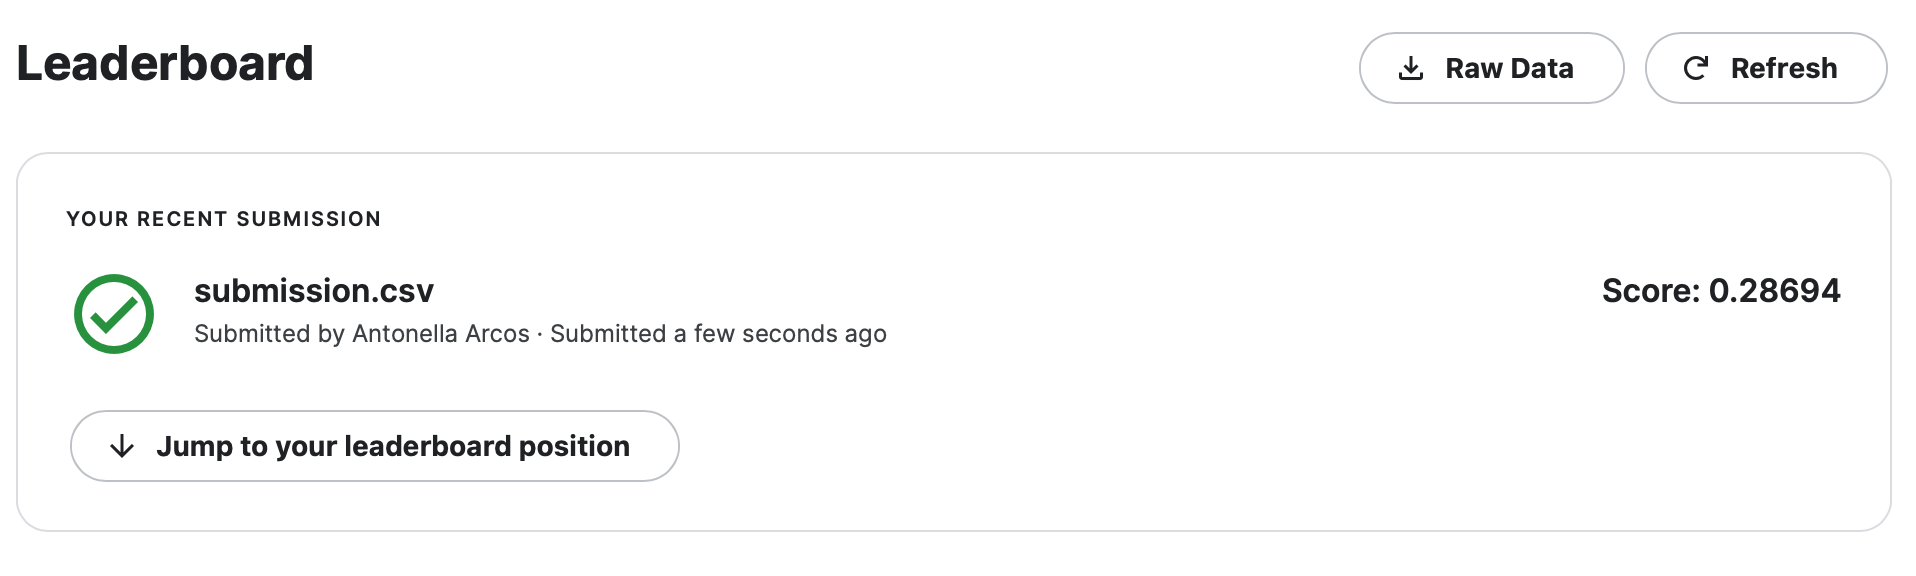